## assignment 2

Data: Use data from “Public school Data.zip” to answer questions Q2, Q3 and Q4  
through Visuals + Contexts

Q4. Plot the distribution of Schools’ FT_TEACHER over states and indicate which highest, lowest of High and Elementary schools. 

In [23]:
from   zipfile  import  ZipFile  as  zf 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd

with  zf('data/Public_Schools.zip','r')  as  fp: 
    fp.extractall('data')

schools = gpd.read_file('data/Public_Schools/PublicSchools.shp')

schools.head()

# Keep only needed columns
schools_filtered = schools[['STATE','LEVEL_','FT_TEACHER', 'geometry', 'ENROLLMENT']]

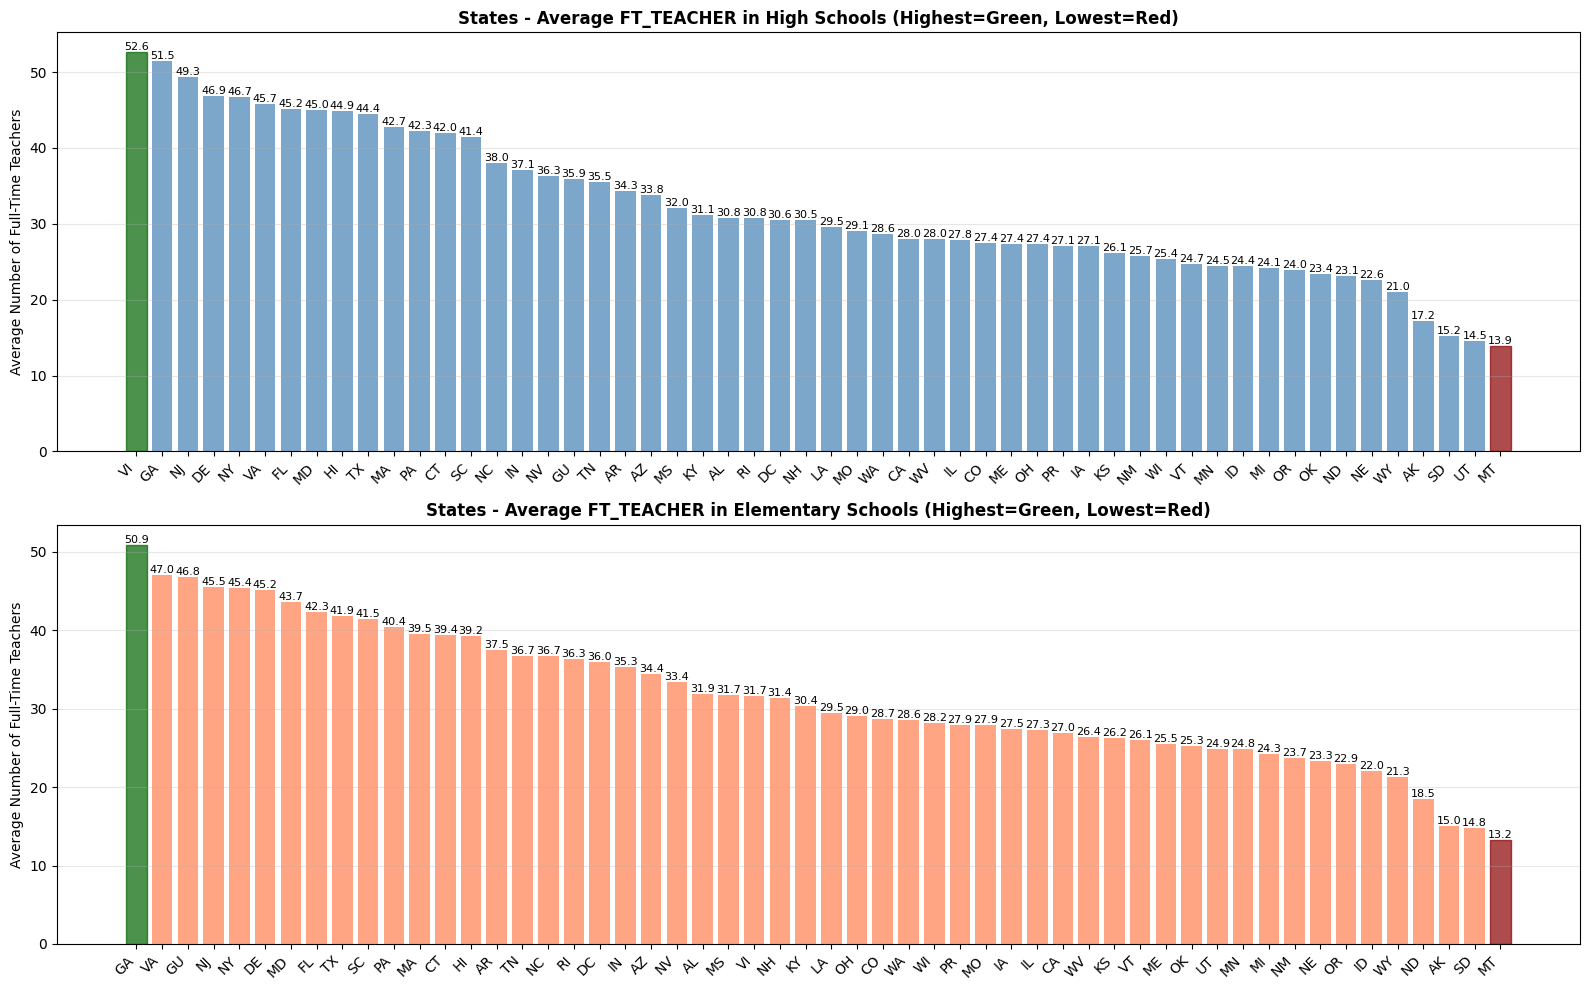

In [24]:


# Filter for High and Elementary schools
schools_filtered = schools_filtered[schools_filtered['LEVEL_'].isin(['HIGH', 'ELEMENTARY'])]

# Remove invalid FT_TEACHER values (-999 = missing data)
schools_filtered = schools_filtered[schools_filtered['FT_TEACHER'] > 0]

# Separate data by school level
high_schools = schools_filtered[schools_filtered['LEVEL_'] == 'HIGH']
elementary_schools = schools_filtered[schools_filtered['LEVEL_'] == 'ELEMENTARY']

# Calculate summary statistics per state
high_stats = high_schools.groupby('STATE')['FT_TEACHER'].agg(['mean', 'median', 'sum', 'count']).reset_index()
elem_stats = elementary_schools.groupby('STATE')['FT_TEACHER'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Create visualization - states by average
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Sort by mean FT_TEACHER  head() can be used to limit to top 20 if needed
high_stats_sorted = high_stats.sort_values('mean', ascending=False)
elem_stats_sorted = elem_stats.sort_values('mean', ascending=False)

# Plot High Schools
x_pos = np.arange(len(high_stats_sorted))
bars1 = ax1.bar(x_pos, high_stats_sorted['mean'], color='steelblue', alpha=0.7)

# Highlight highest and lowest
bars1[0].set_color('darkgreen')
bars1[-1].set_color('darkred')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(high_stats_sorted['STATE'], rotation=45, ha='right')
ax1.set_ylabel('Average Number of Full-Time Teachers')
ax1.set_title('States - Average FT_TEACHER in High Schools (Highest=Green, Lowest=Red)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(high_stats_sorted.iterrows()):
    ax1.text(i, row['mean'], f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=8)

# Plot Elementary Schools
x_pos2 = np.arange(len(elem_stats_sorted))
bars2 = ax2.bar(x_pos2, elem_stats_sorted['mean'], color='coral', alpha=0.7)
# Highlight highest and lowest
bars2[0].set_color('darkgreen')
bars2[-1].set_color('darkred')

ax2.set_xticks(x_pos2)
ax2.set_xticklabels(elem_stats_sorted['STATE'], rotation=45, ha='right')
ax2.set_ylabel('Average Number of Full-Time Teachers')
ax2.set_title('States - Average FT_TEACHER in Elementary Schools (Highest=Green, Lowest=Red)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(elem_stats_sorted.iterrows()):
    ax2.text(i, row['mean'], f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

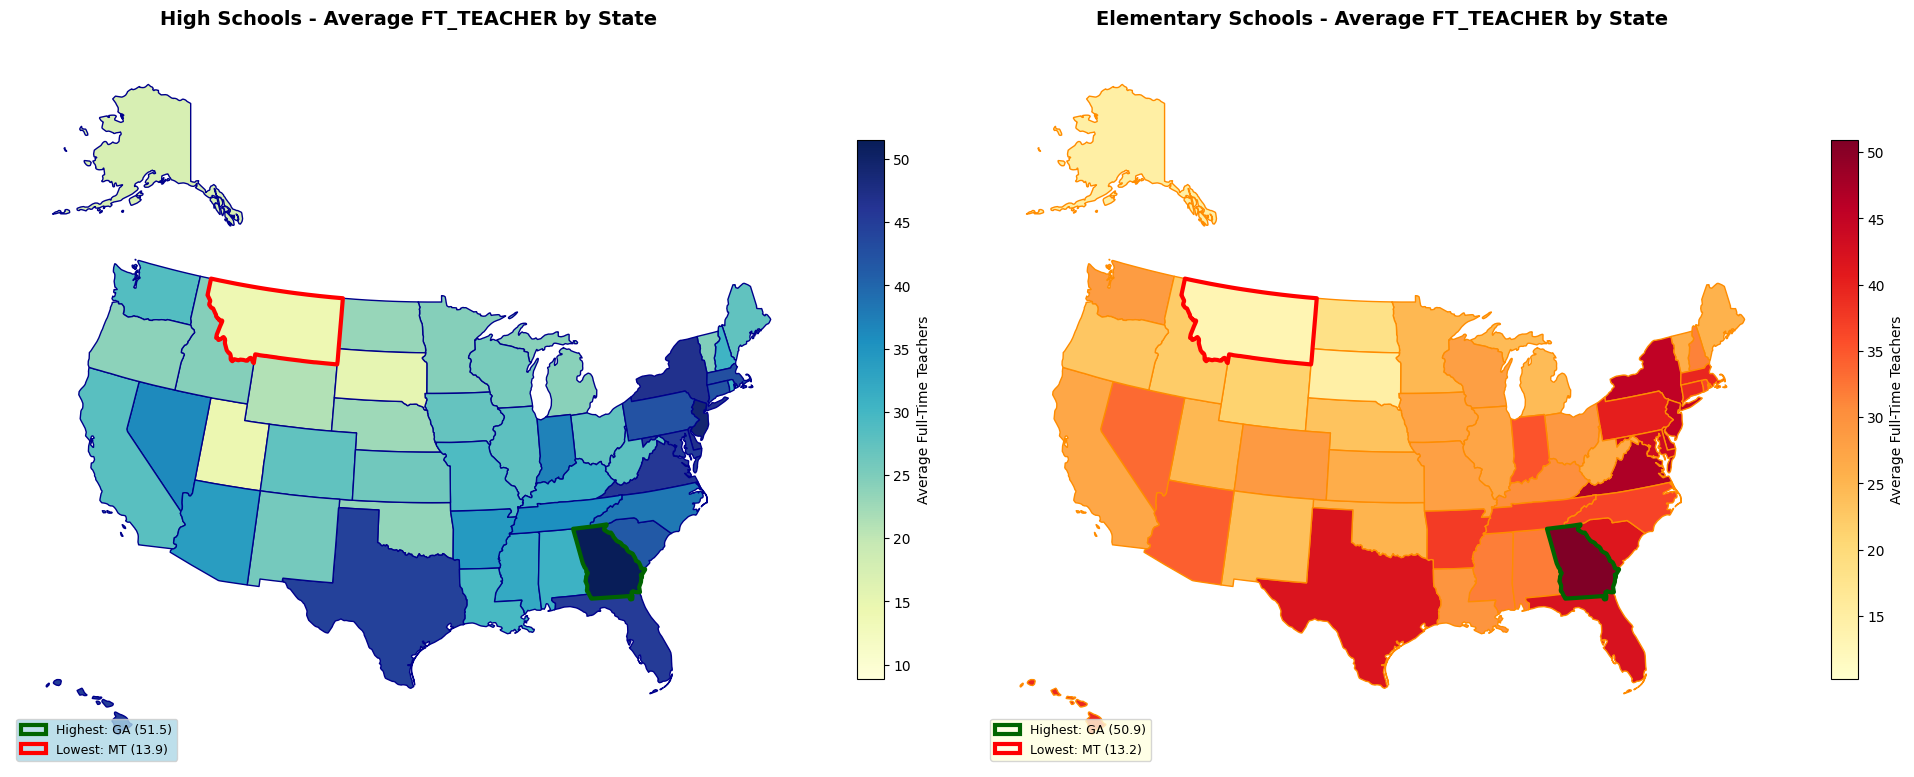


HIGH SCHOOLS - FT_TEACHER DISTRIBUTION
Highest: GA with 51.5 average teachers
Lowest: MT with 13.9 average teachers

ELEMENTARY SCHOOLS - FT_TEACHER DISTRIBUTION
Highest: GA with 50.9 average teachers
Lowest: MT with 13.2 average teachers


In [25]:
from matplotlib.patches import Patch

# Calculate average FT_TEACHER per state for each school level
high_stats_map = high_schools.groupby('STATE')['FT_TEACHER'].mean().reset_index()
high_stats_map.columns = ['STATE', 'AVG_FT_TEACHER']

elem_stats_map = elementary_schools.groupby('STATE')['FT_TEACHER'].mean().reset_index()
elem_stats_map.columns = ['STATE', 'AVG_FT_TEACHER']

# Load US State shapefile
us_states = gpd.read_file('data/US_State.shp')

# Create state abbreviation mapping (US_State uses full names, schools use abbreviations)
state_abbrev_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

us_states['STATE'] = us_states['StateName'].map(state_abbrev_map)

# Merge with statistics
high_map_data = us_states.merge(high_stats_map, on='STATE', how='left')
elem_map_data = us_states.merge(elem_stats_map, on='STATE', how='left')

# Find highest and lowest for each school level (excluding NaN values)
high_highest = high_map_data.loc[high_map_data['AVG_FT_TEACHER'].idxmax()]
high_lowest = high_map_data.loc[high_map_data['AVG_FT_TEACHER'].idxmin()]

elem_highest = elem_map_data.loc[elem_map_data['AVG_FT_TEACHER'].idxmax()]
elem_lowest = elem_map_data.loc[elem_map_data['AVG_FT_TEACHER'].idxmin()]

# Create figure with 2 maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot HIGH SCHOOLS map
high_map_data.plot(
    column='AVG_FT_TEACHER',
    ax=ax1,
    edgecolor='darkblue',
    legend=True,
    cmap='YlGnBu',
    legend_kwds={'label': 'Average Full-Time Teachers', 'shrink': 0.7},
    vmin=high_map_data['AVG_FT_TEACHER'].min() - 5,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)

ax1.axis('off')
ax1.set_title('High Schools - Average FT_TEACHER by State', fontsize=14, fontweight='bold', pad=20)

# Highlight highest and lowest for high schools
gpd.GeoDataFrame([high_highest]).plot(ax=ax1, facecolor='none', edgecolor='darkgreen', linewidth=3)
gpd.GeoDataFrame([high_lowest]).plot(ax=ax1, facecolor='none', edgecolor='red', linewidth=3)

# Add legend patches for high schools
high_lowest_patch = Patch(facecolor='none', edgecolor='red', linewidth=3, 
                          label=f'Lowest: {high_lowest["STATE"]} ({high_lowest["AVG_FT_TEACHER"]:.1f})')
high_highest_patch = Patch(facecolor='none', edgecolor='darkgreen', linewidth=3, 
                           label=f'Highest: {high_highest["STATE"]} ({high_highest["AVG_FT_TEACHER"]:.1f})')
leg1 = ax1.legend(handles=[high_highest_patch, high_lowest_patch], loc='lower left', fontsize=9)
leg1.get_frame().set_facecolor('lightblue')
leg1.get_frame().set_alpha(0.8)

# Plot ELEMENTARY SCHOOLS map
elem_map_data.plot(
    column='AVG_FT_TEACHER',
    ax=ax2,
    edgecolor='darkorange',
    legend=True,
    cmap='YlOrRd',
    legend_kwds={'label': 'Average Full-Time Teachers', 'shrink': 0.7},
    vmin=elem_map_data['AVG_FT_TEACHER'].min() - 3,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)

ax2.axis('off')
ax2.set_title('Elementary Schools - Average FT_TEACHER by State', fontsize=14, fontweight='bold', pad=20)

# Highlight highest and lowest for elementary schools
gpd.GeoDataFrame([elem_highest]).plot(ax=ax2, facecolor='none', edgecolor='darkgreen', linewidth=3)
gpd.GeoDataFrame([elem_lowest]).plot(ax=ax2, facecolor='none', edgecolor='red', linewidth=3)

# Add legend patches for elementary schools
elem_lowest_patch = Patch(facecolor='none', edgecolor='red', linewidth=3, 
                          label=f'Lowest: {elem_lowest["STATE"]} ({elem_lowest["AVG_FT_TEACHER"]:.1f})')
elem_highest_patch = Patch(facecolor='none', edgecolor='darkgreen', linewidth=3, 
                           label=f'Highest: {elem_highest["STATE"]} ({elem_highest["AVG_FT_TEACHER"]:.1f})')
leg2 = ax2.legend(handles=[elem_highest_patch, elem_lowest_patch], loc='lower left', fontsize=9)
leg2.get_frame().set_facecolor('lightyellow')
leg2.get_frame().set_alpha(0.8)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("HIGH SCHOOLS - FT_TEACHER DISTRIBUTION")
print("="*70)
print(f"Highest: {high_highest['STATE']} with {high_highest['AVG_FT_TEACHER']:.1f} average teachers")
print(f"Lowest: {high_lowest['STATE']} with {high_lowest['AVG_FT_TEACHER']:.1f} average teachers")

print("\n" + "="*70)
print("ELEMENTARY SCHOOLS - FT_TEACHER DISTRIBUTION")
print("="*70)
print(f"Highest: {elem_highest['STATE']} with {elem_highest['AVG_FT_TEACHER']:.1f} average teachers")
print(f"Lowest: {elem_lowest['STATE']} with {elem_lowest['AVG_FT_TEACHER']:.1f} average teachers")


"Q5. Plot the distribution of Schools’ ENROLLMENT and compare it with the plot in the   Indicate those three regions which have lowest ENROLLMENT to FT_TEACHER ratio."

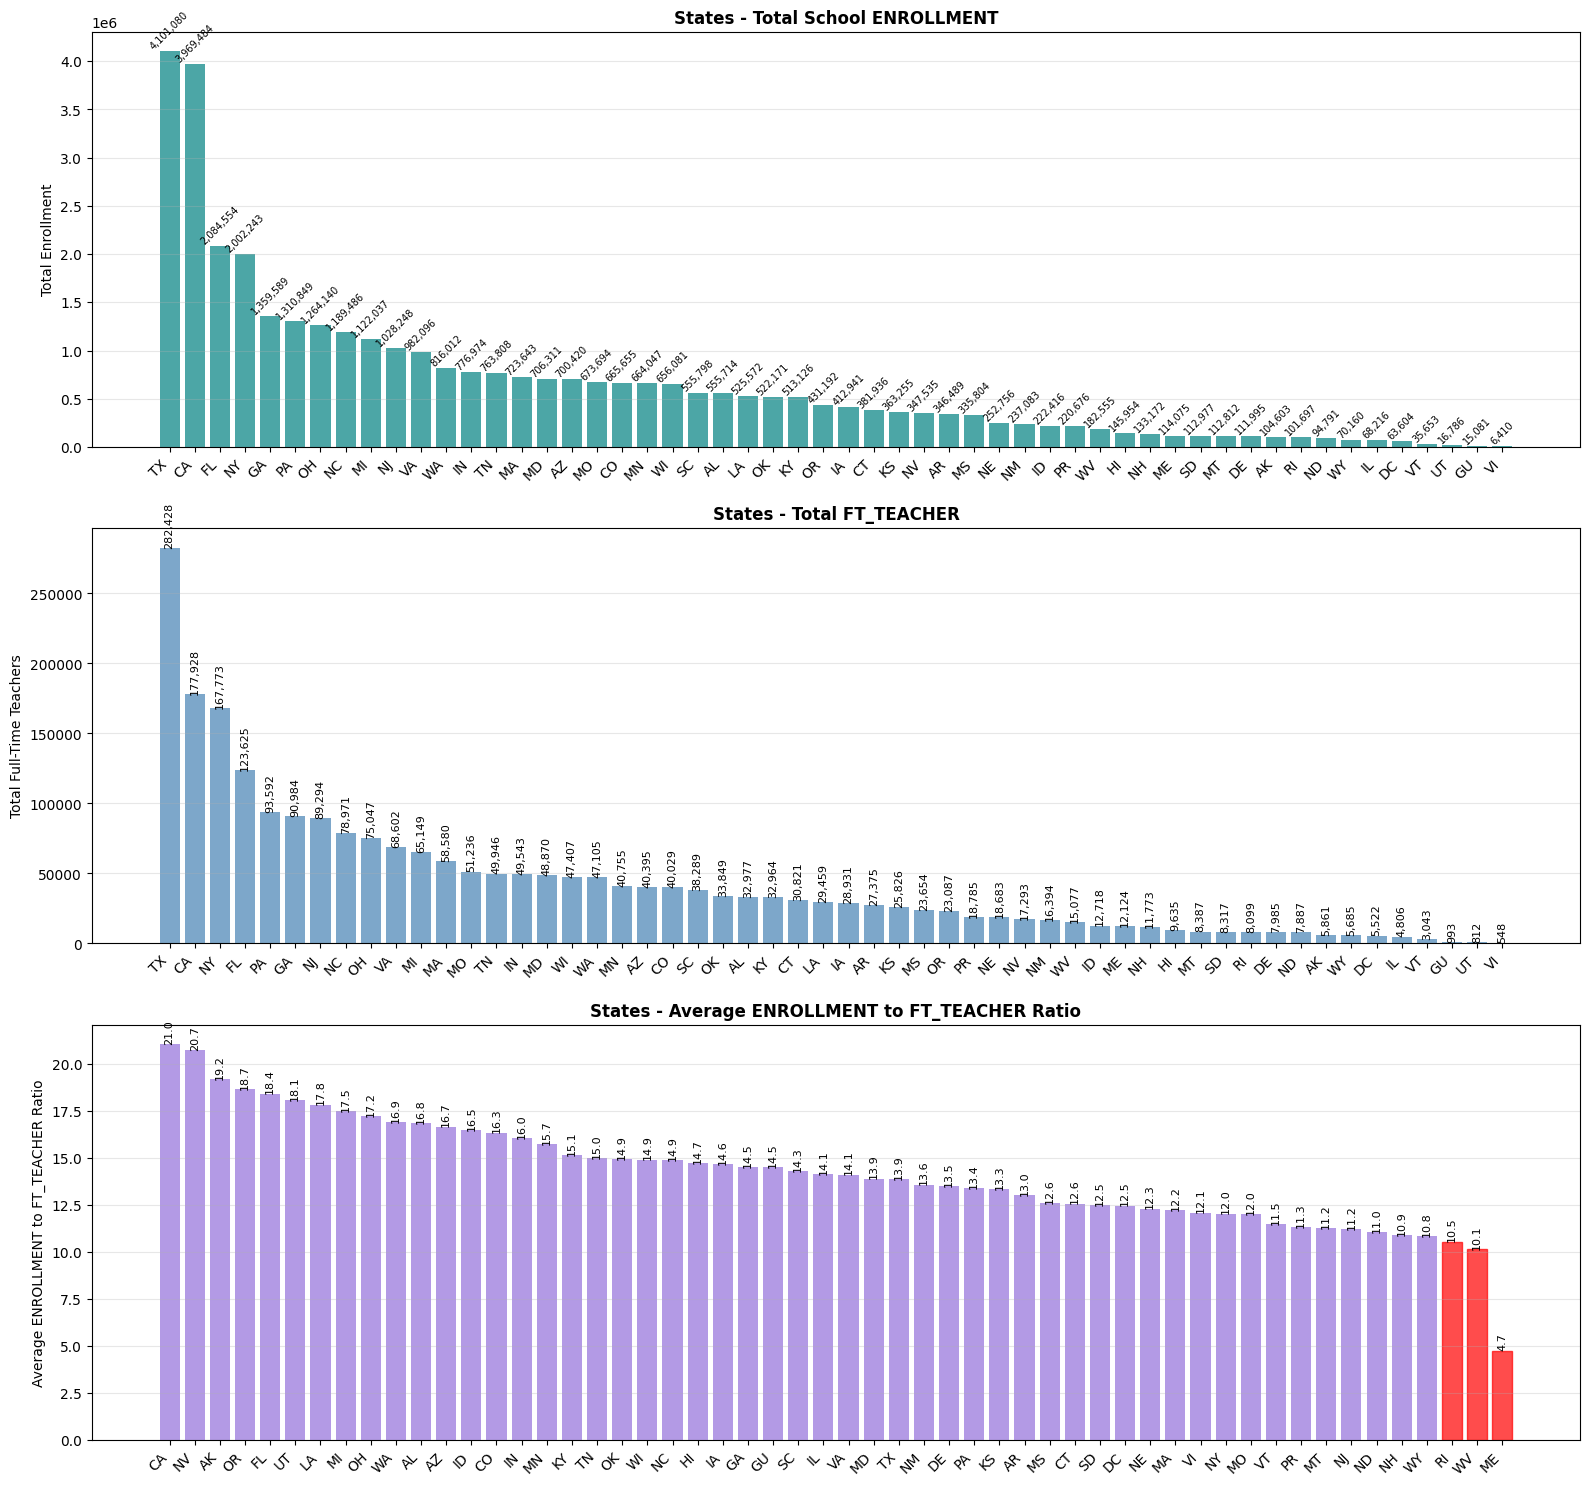


THREE STATES WITH LOWEST ENROLLMENT TO FT_TEACHER RATIO
ME: 4.74 students per teacher
WV: 10.14 students per teacher
RI: 10.54 students per teacher


In [26]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

# 1. Plot the distribution of Schools' ENROLLMENT over states
enrollment_by_state = schools_filtered.groupby('STATE')['ENROLLMENT'].sum().reset_index()
enrollment_by_state = enrollment_by_state.sort_values('ENROLLMENT', ascending=False)

x_pos1 = np.arange(len(enrollment_by_state))
bars1 = ax1.bar(x_pos1, enrollment_by_state['ENROLLMENT'], color='teal', alpha=0.7)
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(enrollment_by_state['STATE'], rotation=45, ha='right')
ax1.set_ylabel('Total Enrollment')
ax1.set_title('States - Total School ENROLLMENT', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(enrollment_by_state.iterrows()):
   ax1.text(i, row['ENROLLMENT'], f"{row['ENROLLMENT']:,.0f}", ha='center', va='bottom', fontsize=7, rotation=45)

# 2. Plot the distribution of Schools' FT_TEACHER over states
teachers_by_state = schools_filtered.groupby('STATE')['FT_TEACHER'].sum().reset_index()
teachers_by_state = teachers_by_state.sort_values('FT_TEACHER', ascending=False)

x_pos2 = np.arange(len(teachers_by_state))
bars2 = ax2.bar(x_pos2, teachers_by_state['FT_TEACHER'], color='steelblue', alpha=0.7)
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(teachers_by_state['STATE'], rotation=45, ha='right')
ax2.set_ylabel('Total Full-Time Teachers')
ax2.set_title('States - Total FT_TEACHER', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(teachers_by_state.iterrows()):
   ax2.text(i, row['FT_TEACHER'], f"{row['FT_TEACHER']:,.0f}", ha='center', va='bottom', fontsize=8, rotation=90)

# 3. Calculate and plot ENROLLMENT to FT_TEACHER ratio
schools_filtered['ENROLLMENT_FT_TEACHER_RATIO'] = schools_filtered['ENROLLMENT'] / schools_filtered['FT_TEACHER']
ratio_by_state = schools_filtered.groupby('STATE')['ENROLLMENT_FT_TEACHER_RATIO'].mean().reset_index()
ratio_by_state = ratio_by_state.sort_values('ENROLLMENT_FT_TEACHER_RATIO', ascending=False)

x_pos3 = np.arange(len(ratio_by_state))
bars3 = ax3.bar(x_pos3, ratio_by_state['ENROLLMENT_FT_TEACHER_RATIO'], color='mediumpurple', alpha=0.7)
ax3.set_xticks(x_pos3)
ax3.set_xticklabels(ratio_by_state['STATE'], rotation=45, ha='right')
ax3.set_ylabel('Average ENROLLMENT to FT_TEACHER Ratio')
ax3.set_title('States - Average ENROLLMENT to FT_TEACHER Ratio', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(ratio_by_state.iterrows()):
   ax3.text(i, row['ENROLLMENT_FT_TEACHER_RATIO'], f"{row['ENROLLMENT_FT_TEACHER_RATIO']:.1f}", ha='center', va='bottom', fontsize=8, rotation=90)


# Highlight The the three regions which have lowest ENROLLMENT to FT_TEACHER ratio
bars3[-1].set_color('red')
bars3[-2].set_color('red')
bars3[-3].set_color('red')


plt.tight_layout()
plt.show()

# Identify three states with lowest ENROLLMENT to FT_TEACHER ratio
lowest_three = ratio_by_state.nsmallest(3, 'ENROLLMENT_FT_TEACHER_RATIO')
print("\n" + "="*70)
print("THREE STATES WITH LOWEST ENROLLMENT TO FT_TEACHER RATIO")
print("="*70)
for idx, row in lowest_three.iterrows():
    print(f"{row['STATE']}: {row['ENROLLMENT_FT_TEACHER_RATIO']:.2f} students per teacher")


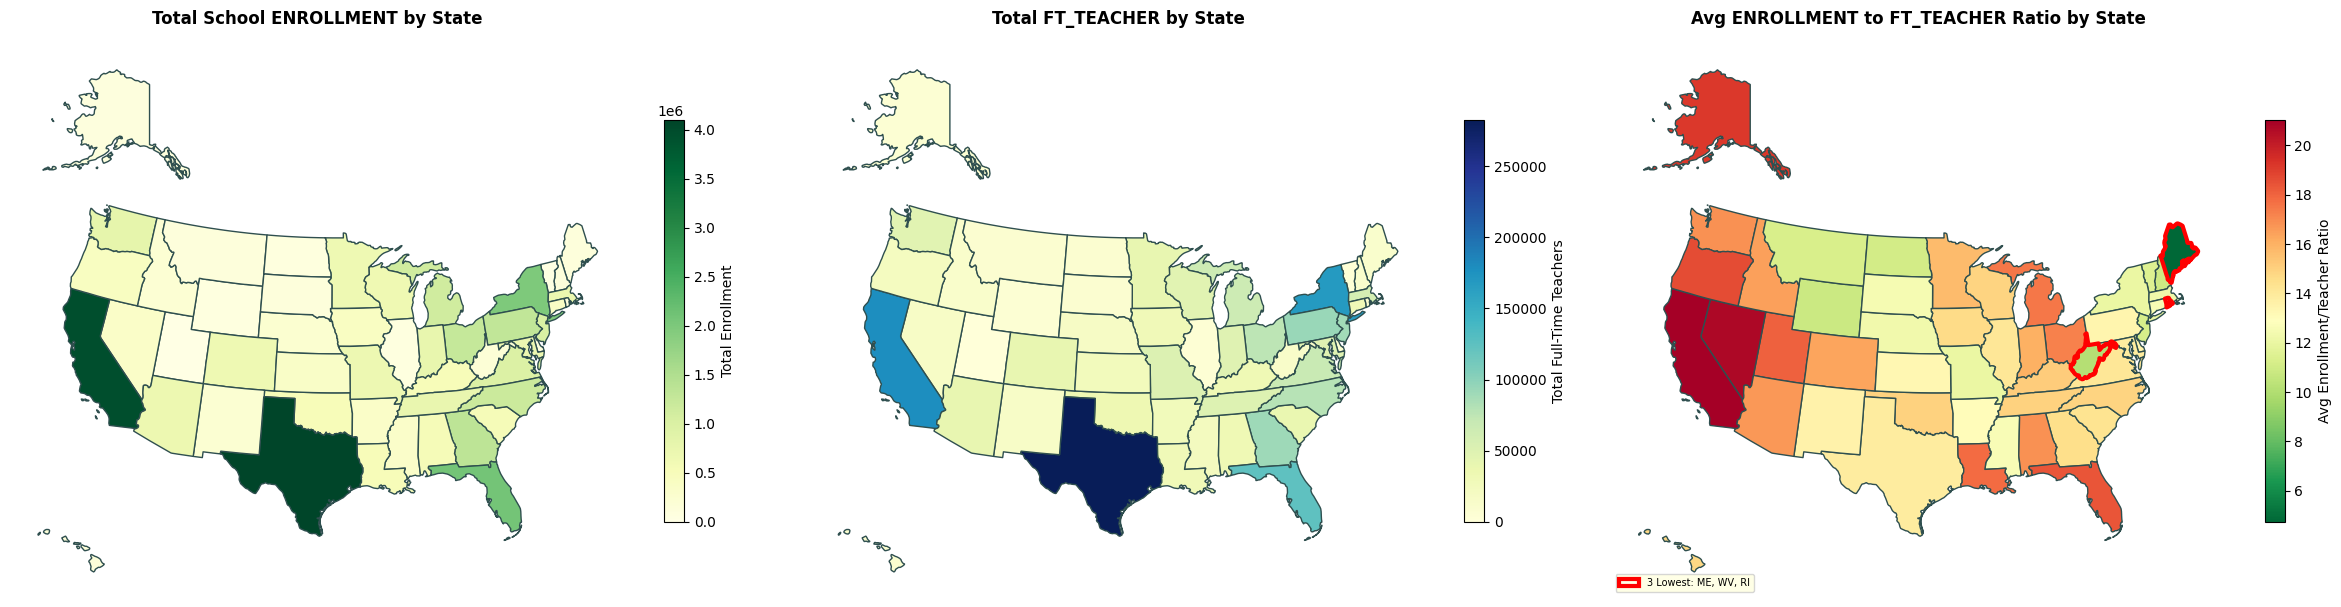

In [ ]:
from matplotlib.patches import Patch

# Calculate metrics per state for mapping
enrollment_map = schools_filtered.groupby('STATE')['ENROLLMENT'].sum().reset_index()
enrollment_map.columns = ['STATE', 'TOTAL_ENROLLMENT']

teachers_map = schools_filtered.groupby('STATE')['FT_TEACHER'].sum().reset_index()
teachers_map.columns = ['STATE', 'TOTAL_FT_TEACHER']

ratio_map = schools_filtered.groupby('STATE')['ENROLLMENT_FT_TEACHER_RATIO'].mean().reset_index()
ratio_map.columns = ['STATE', 'AVG_RATIO']

# Load US State shapefile and add state abbreviations
us_states_q5 = gpd.read_file('data/US_State.shp')
state_abbrev_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}
us_states_q5['STATE'] = us_states_q5['StateName'].map(state_abbrev_map)

# Merge data with state geometries
enrollment_map_data = us_states_q5.merge(enrollment_map, on='STATE', how='left')
teachers_map_data = us_states_q5.merge(teachers_map, on='STATE', how='left')
ratio_map_data = us_states_q5.merge(ratio_map, on='STATE', how='left')

# Find extremes
ratio_lowest = ratio_map_data.loc[ratio_map_data['AVG_RATIO'].idxmin()]
ratio_second_lowest = ratio_map_data.nsmallest(2, 'AVG_RATIO').iloc[1]
ratio_third_lowest = ratio_map_data.nsmallest(3, 'AVG_RATIO').iloc[2]

# Create figure with 3 maps
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))

# 1. ENROLLMENT MAP
enrollment_map_data.plot(
    column='TOTAL_ENROLLMENT',
    ax=ax1,
    edgecolor='darkslategray',
    legend=True,
    cmap='YlGn',
    legend_kwds={'label': 'Total Enrollment', 'shrink': 0.6},
    vmin=0,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)
ax1.axis('off')
ax1.set_title('Total School ENROLLMENT by State', fontsize=12, fontweight='bold', pad=15)
leg1.get_frame().set_facecolor('lightgreen')
leg1.get_frame().set_alpha(0.8)

# 2. FT_TEACHER MAP
teachers_map_data.plot(
    column='TOTAL_FT_TEACHER',
    ax=ax2,
    edgecolor='darkslategray',
    legend=True,
    cmap='YlGnBu',
    legend_kwds={'label': 'Total Full-Time Teachers', 'shrink': 0.6},
    vmin=0,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)
ax2.axis('off')
ax2.set_title('Total FT_TEACHER by State', fontsize=12, fontweight='bold', pad=15)

leg2.get_frame().set_facecolor('lightblue')
leg2.get_frame().set_alpha(0.8)

# 3. ENROLLMENT TO FT_TEACHER RATIO MAP
ratio_map_data.plot(
    column='AVG_RATIO',
    ax=ax3,
    edgecolor='darkslategray',
    legend=True,
    cmap='RdYlGn_r',
    legend_kwds={'label': 'Avg Enrollment/Teacher Ratio', 'shrink': 0.6},
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)
ax3.axis('off')
ax3.set_title('Avg ENROLLMENT to FT_TEACHER Ratio by State', fontsize=12, fontweight='bold', pad=15)

gpd.GeoDataFrame([ratio_lowest]).plot(ax=ax3, facecolor='none', edgecolor='black', linewidth=3)
gpd.GeoDataFrame([ratio_second_lowest]).plot(ax=ax3, facecolor='none', edgecolor='black', linewidth=3)
gpd.GeoDataFrame([ratio_third_lowest]).plot(ax=ax3, facecolor='none', edgecolor='black', linewidth=3)

ratio_low_patch = Patch(facecolor='none', edgecolor='black', linewidth=3,
                        label=f'3 Lowest: {ratio_lowest["STATE"]}, {ratio_second_lowest["STATE"]}, {ratio_third_lowest["STATE"]}')
leg3 = ax3.legend(handles=[ratio_low_patch], loc='lower left', fontsize=7)
leg3.get_frame().set_facecolor('lightyellow')
leg3.get_frame().set_alpha(0.8)

plt.tight_layout()
plt.show()

